# Iris Project

## 1) Przygotowanie do analizu

### Od razu importuemy wszystkie urzywany biblioteki

In [182]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sn

### Wczytywamy zbiór danych

In [183]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

# Dodajemy jeszcze nazwy do kolumn, dla lepszej vizualizacji danych
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# Styles
styles = [
    dict(selector="th, tr", props=[("font-size", "130%"),
                               ("text-align", "center")])
]

# Wczytujemy dane do obiekta DataFrame biblioteki pandas
dataset = pd.read_csv(url, names=names)
dataset.style.set_table_styles(styles)
type(dataset)

pandas.core.frame.DataFrame

##  2) Podsumowanie zbiora danych (za pomocą Pandas)

![iris-data](assets/iris-petal-sepal.png)

### Rozmiary zbióra danych

In [184]:
dataset.shape
# To pomaga nam podejmować poprawne decyzji 

(150, 5)

### Pierwszy 30 rekordów z tego zbióra danych

In [185]:
dataset.head(30)
# Żeby zrozumieć z jakimi danymy pracujemy miło będzie zobaczyć kilkadziesiąt danych

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Ogólna statystyka tego zbióra danych

In [186]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Z tej szybkiej statystyki od razu możemy zwrócić uwagę, że dlugość kwiat więciej niż szerokość i że płatki sepala są więcej niż płatki petala. Również możemy zauważić, że długość petala szybko rośną, więc ma dużą amplitudę w poruwnaniu z sepalem.

### Rozkład klas

In [187]:
dataset.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Widzimy, że mamy 3 róznych rodzaju irusu.

## 3) Vizualizacja danych (za pomocą matplotlib)

### Wykresy jednoczynnikowe

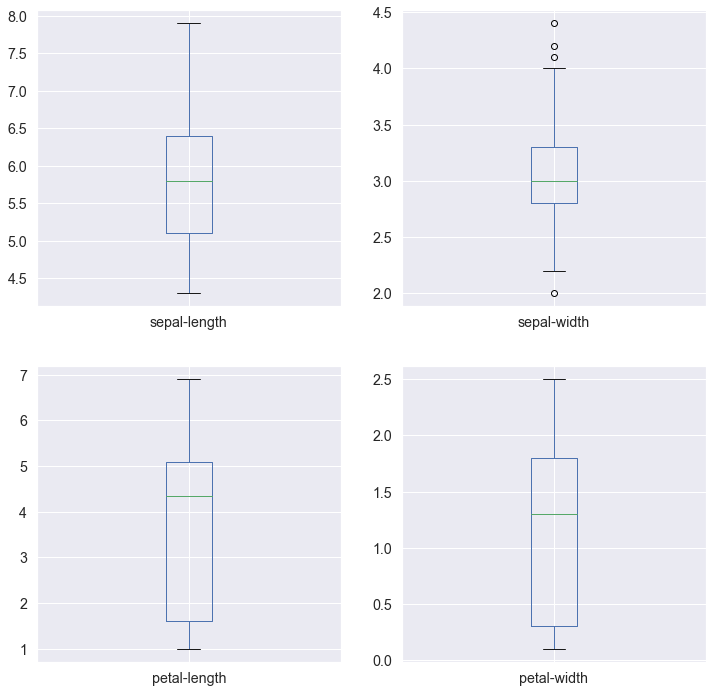

In [188]:
# plots
dataset.plot(kind="box", subplots=True, layout=(2, 2), figsize=(12, 12))
mpl.pyplot.show()

Jak pisałem wcześniej, amplituda jest znacznie większa w petal, co jest wyraźnie widoczne na wykresie. Również teraz możemy powiedzieć, że petal ma średnio dłuższe płatki niż krótkie.

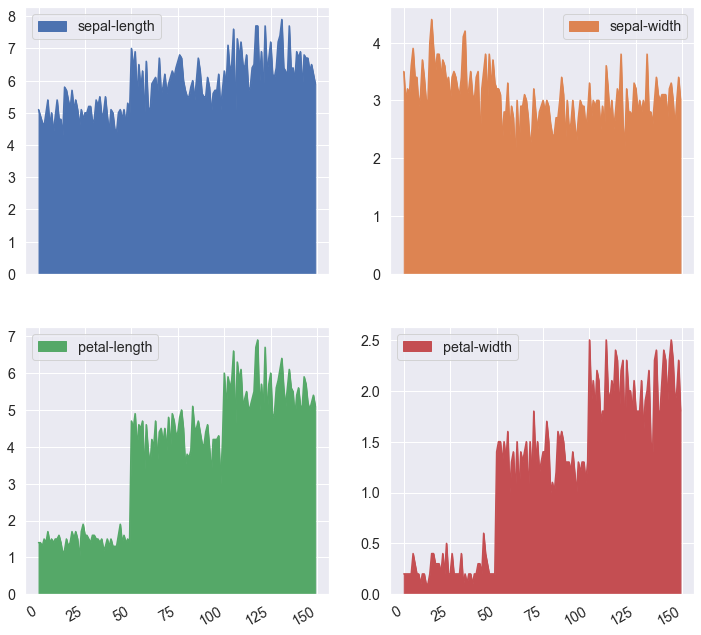

In [189]:
dataset.plot(kind="area", subplots=True, layout=(2, 2), figsize=(12, 12))
mpl.pyplot.show()

Tu również widoczne, że amplituda petala dużo zmianina

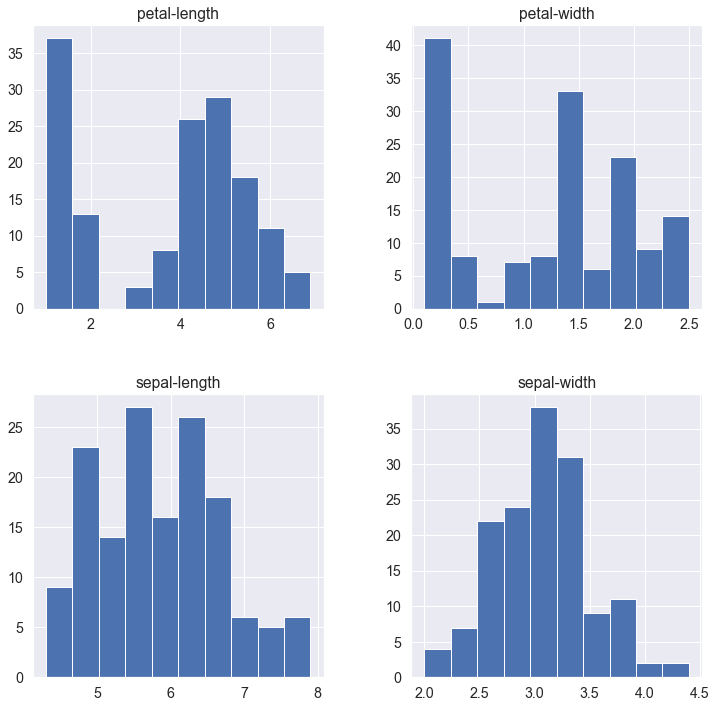

In [190]:
# histograms
dataset.hist(figsize=(12, 12))
mpl.pyplot.show()

Z histogramie widoczne, jakich irisów więcej: z długimi i szerokimi płatkami lub krótkimi i wąskimi. N.p. Petal ma więcej małych płatków podczas Sepal ma więcej średnich rozmiarów.

### Wykresy wielowymiarowe

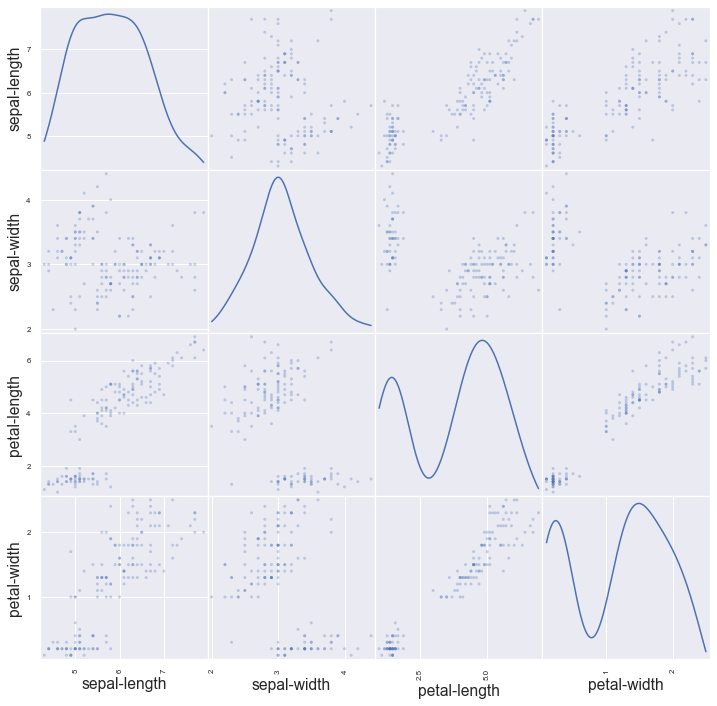

In [191]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(12, 12), alpha=0.3, diagonal='kde')
mpl.pyplot.show()

## 4) Wybraniu algorytmu

### Tworzenie zestawa sprawdzania poprawności

Teraz żeby zrozumieć czy nasza model danych jest skuteczna, musimy przetestować naszą model róznymy algoritmami.
Najpierw, podzielimy nasz zbiór danych na dwa zbióra: 1) Zbiór do treningu danych. 2) Zbiór do testowania, czy nasza model skuteczna.

In [192]:
# Importujemy metodę to tworzenia zbiórów do treningu i testowania
from sklearn.model_selection import train_test_split
array = dataset.values

# Zbiór X jest zbiorem długości i szerokości irisu
X = array[:, 0:4]

# Zbiór Y jest zbiorem klassów irisu
Y = array[:, 4]

"""
Wynikiem metody "train_test_split" jest 2 podanych zbiorów podzielonych na 2: do treningu i do testowania.
Parametr test_size zbiera procent danych do testowania. random_state - to losowa liczba.
"""
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.25, random_state=0)

print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)

(112, 4) (112,)
(38, 4) (38,)


### Wybranie algorytmu

In [193]:
# Importuemy wymagane algorytmy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Importujemy wymagane metody do testowania wyników róznych algorytmów
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Tworzymy listę z wszystkimi algorytmami
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Dla każdego algorytmu testujemy sposobem "cross-validation" i wyświetlamy procent dokładności
results = []
names = []
for name, model in models:
    # kfold - to jest specjalny walidator danych, który używa "cross-validation"
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    
    # Tu testuejemy dokładność
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    # Dodajemy wynik i nazwę do listy i wyświetlamy 
    results.append(cv_results)
    names.append(name)
    
    # Gdzie name - nazwa, cv_results.mean() - wartość średnia czy dokładność, cv_results.std() - odchylenie
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.946212 (0.059887)
LDA: 0.982576 (0.034890)
KNN: 0.963636 (0.060302)
CART: 0.945455 (0.060302)
NB: 0.946212 (0.059887)
SVM: 0.963636 (0.060302)


Z wyników możemy zrozumieć, że najdokładniejszym algorytmem będzie "LinearDiscriminantAnalysis". Aby było bardziej oczywistym, możemy wyświetlić wykres wyników.

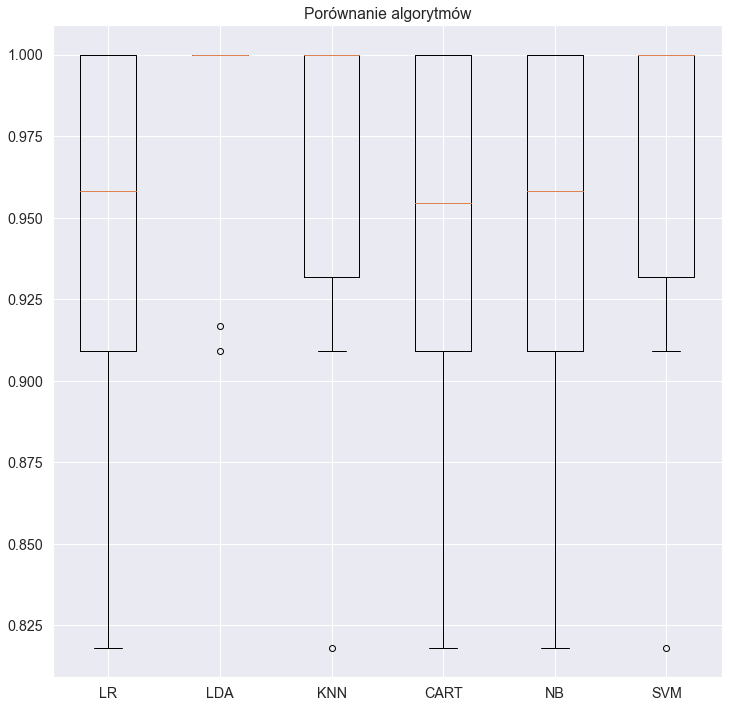

In [194]:
# Wyświetlamy to za pomocą matplotlib
mpl.pyplot.figure(figsize = (12,12))
mpl.pyplot.boxplot(results, labels=names)
mpl.pyplot.title('Porównanie algorytmów')
mpl.pyplot.show()

Tu jest widoczne, że najdokładniejszymi algorytmami są "LDA", "KNN" i "SVM". Ale algorytmy "KNN" i "SVM" mają odchylenie w dwa razy większe niż algorytm "LDA", więć będziemy urzywać algorytm "LDA".

## 5) Prognozowanie wyników

Teraz musimy zbudować naszą model na podstawie wybranego algorytmu i zbiorów do treningu. Potem możemy zprognozować klass irisu na podstawie zbióra testowego X (na podstawie tylko dlugości i szerokości).

In [195]:
# Wybieramy algorytm
model = LinearDiscriminantAnalysis()

# Budujemy model
model.fit(X_train, Y_train)

# Zrobimy prognoz na podstawie zbióra do testowania
predictions = model.predict(X_validation)

# Połączymy dane do testowania, prognoz klasy i prawdziwą klasę
data_joined = np.column_stack((X_validation, predictions, Y_validation))

# Tworzymy tablicę danych i wyświetlamy
result = pd.DataFrame(data_joined, columns=['s-length', 's-width', 'p-length', 'p-width', 'predicted', "actual"])
result.style.set_table_styles(styles)

,s-length,s-width,p-length,p-width,predicted,actual
0,5.800000,2.800000,5.100000,2.400000,Iris-virginica,Iris-virginica
1,6.000000,2.200000,4.000000,1.000000,Iris-versicolor,Iris-versicolor
2,5.500000,4.200000,1.400000,0.200000,Iris-setosa,Iris-setosa
3,7.300000,2.900000,6.300000,1.800000,Iris-virginica,Iris-virginica
4,5.000000,3.400000,1.500000,0.200000,Iris-setosa,Iris-setosa
5,6.300000,3.300000,6.000000,2.500000,Iris-virginica,Iris-virginica
6,5.000000,3.500000,1.300000,0.300000,Iris-setosa,Iris-setosa
7,6.700000,3.100000,4.700000,1.500000,Iris-versicolor,Iris-versicolor
8,6.800000,2.800000,4.800000,1.400000,Iris-versicolor,Iris-versicolor
9,6.100000,2.800000,4.000000,1.300000,Iris-versicolor,Iris-versicolor


Jak możemy zobaczyć nie zbiegają się tylko klasa pod numerem 37.
Dla  bardziej oczywistości, możemy wyświetlić małe statystyki.

Dokładność prognozowania: 97.37%


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,13.000000
Iris-versicolor,1.000000,0.937500,0.967742,16.000000
Iris-virginica,0.900000,1.000000,0.947368,9.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.966667,0.979167,0.971703,38.000000
weighted avg,0.976316,0.973684,0.973952,38.000000


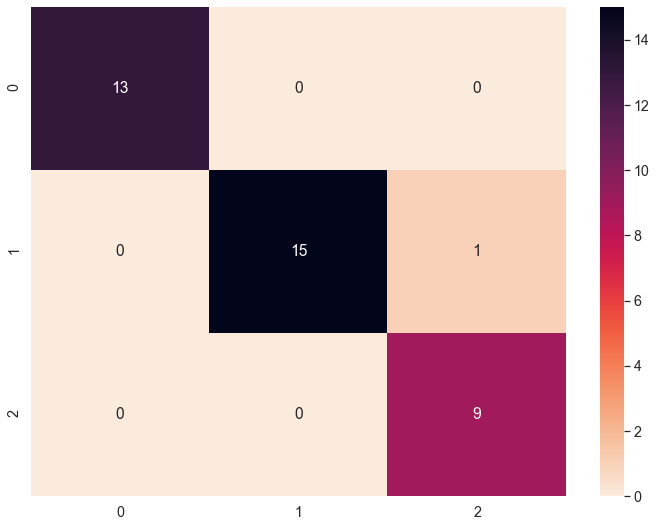

In [196]:
# Importujemy metody do liczenia statystyki
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dokładność
print(f'Dokładność prognozowania: {round(accuracy_score(Y_validation, predictions) * 100, 2)}%')

# Confusion matrix
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions))
mpl.pyplot.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True, cmap = sn.cm.rocket_r)

# Classification report
classification = pd.DataFrame(classification_report(Y_validation, predictions, output_dict=True)).transpose()
classification.name = "Classification report"
classification.style.set_table_styles(styles)

Mamy jedno niedopasowanie, więc dokładność jest 36/37 = 97%. Na matrycy widzimy, że tylko jeden element nie znajduje się na głównej przekątnej. To jest to same niedopasowanie. Wsztkie inne liczby pokazują, ile irisów należy do odpowiedniej klasy. Z classification report, możemy zobaczyć jaki klas niedopasował(precision), jaki klas przewidywan niepoprawne(recall), ważoną średnią harmoniczną (f1-score) i ilość odgadniętych wyników dla każdej klasy(support).

## 6) Testowanie

I teraz możemy przetestować inne algorytmy, żeby porównać ich.

In [197]:
def test_algorythm(algorythm):
    # Wybieramy algorytm
    model = algorythm
    
    # Budujemy model
    model.fit(X_train, Y_train)

    # Zrobimy prognoz na podstawie zbióra do testowania
    predictions = model.predict(X_validation)

    # Połączymy dane do testowania, prognoz klasy i prawdziwą klasę
    data_joined = np.column_stack((X_validation, predictions, Y_validation))

    # Tworzymy tablicę danych i wyświetlamy jej
    result = pd.DataFrame(data_joined, columns=['s-length', 's-width', 'p-length', 'p-width', 'predicted', "actual"])

    # Confusion matrix
    df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions))
    mpl.pyplot.figure(figsize = (12,9))
    sn.heatmap(df_cm, annot=True, cmap = sn.cm.rocket_r)

    # Classification report
    classification = pd.DataFrame(classification_report(Y_validation, predictions, output_dict=True)).transpose()
    return classification.style.set_table_styles(styles)


### LogisticRegression

,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,13.000000
Iris-versicolor,1.000000,0.687500,0.814815,16.000000
Iris-virginica,0.642857,1.000000,0.782609,9.000000
accuracy,0.868421,0.868421,0.868421,0.868421
macro avg,0.880952,0.895833,0.865808,38.000000
weighted avg,0.915414,0.868421,0.870540,38.000000


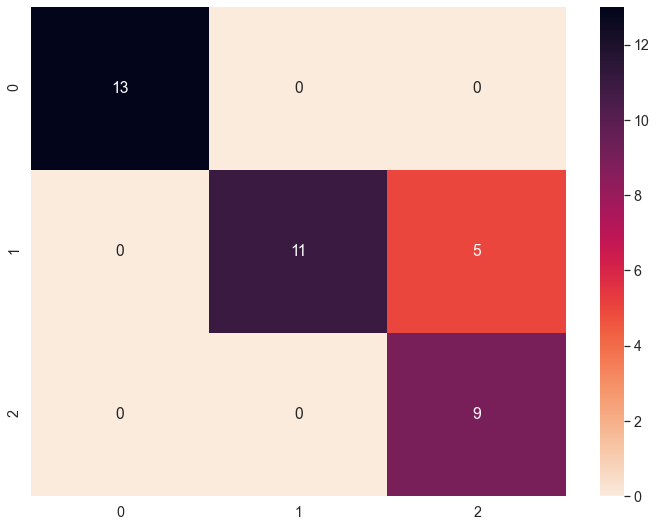

In [198]:
test_algorythm(LogisticRegression(solver='liblinear', multi_class='ovr'))

### KNeighborsClassifier

,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,13.000000
Iris-versicolor,1.000000,0.937500,0.967742,16.000000
Iris-virginica,0.900000,1.000000,0.947368,9.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.966667,0.979167,0.971703,38.000000
weighted avg,0.976316,0.973684,0.973952,38.000000


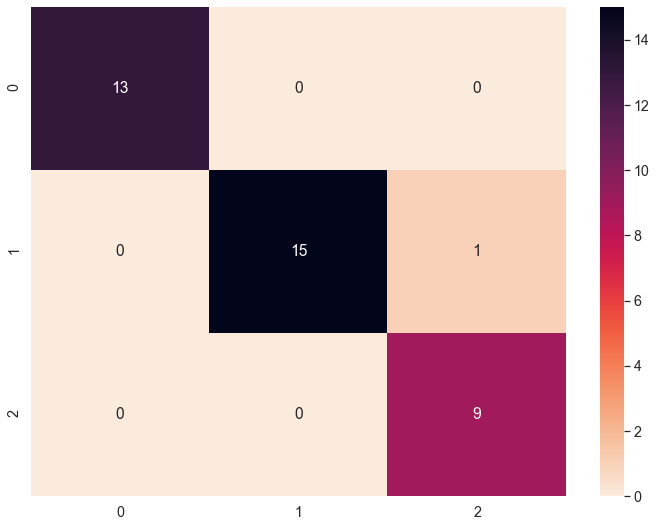

In [199]:
test_algorythm(KNeighborsClassifier())

### DecisionTreeClassifier

,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,13.000000
Iris-versicolor,1.000000,0.937500,0.967742,16.000000
Iris-virginica,0.900000,1.000000,0.947368,9.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.966667,0.979167,0.971703,38.000000
weighted avg,0.976316,0.973684,0.973952,38.000000


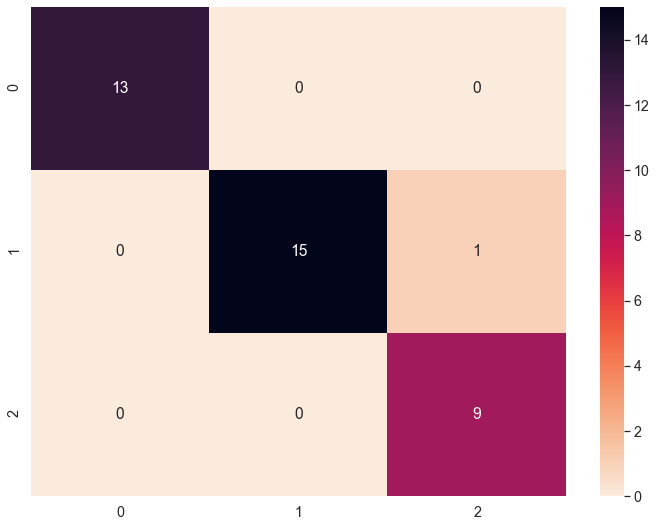

In [200]:
test_algorythm(DecisionTreeClassifier())

### GaussianNB

,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,13.000000
Iris-versicolor,1.000000,1.000000,1.000000,16.000000
Iris-virginica,1.000000,1.000000,1.000000,9.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,38.000000
weighted avg,1.000000,1.000000,1.000000,38.000000


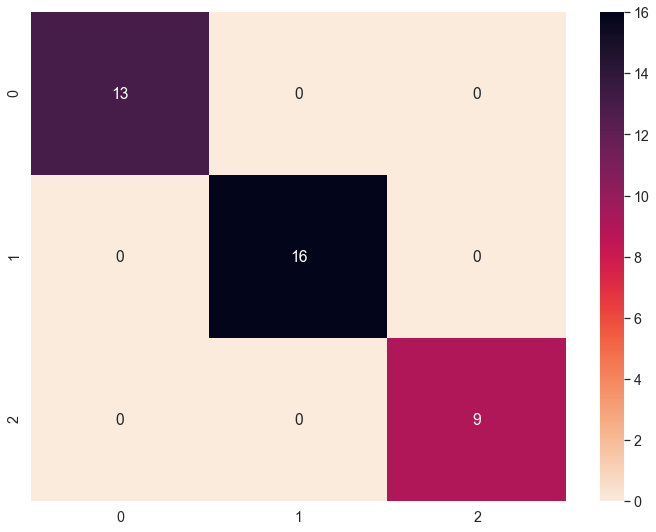

In [201]:
test_algorythm(GaussianNB())

### SVC

,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,13.000000
Iris-versicolor,1.000000,0.937500,0.967742,16.000000
Iris-virginica,0.900000,1.000000,0.947368,9.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.966667,0.979167,0.971703,38.000000
weighted avg,0.976316,0.973684,0.973952,38.000000


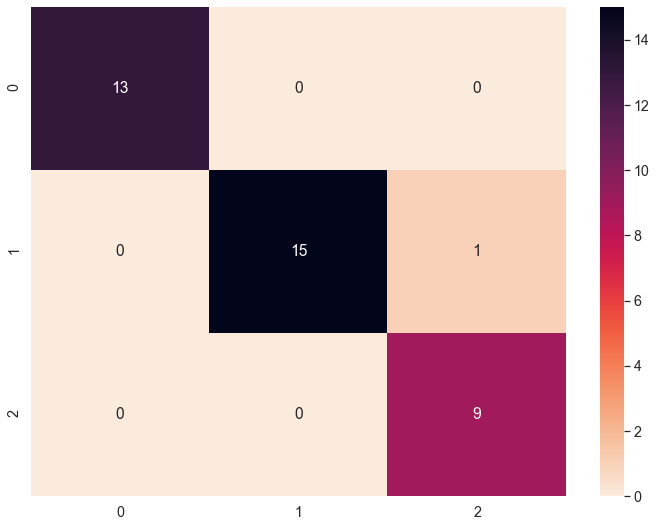

In [202]:
test_algorythm(SVC(gamma='auto'))

### Podsumowanie

Ku mojemu zaskoczeniu, algorytm "GaussianNB" okazał się najdokładniejszym algorytmem, chociaż należał do grupy najmniej dokładnych. Ale najgorszym algorytmem (znowu, ku mojemu zdziwieniu) był algorytm "LogisticRegression", chociaż miał dokładnie takie samo prawdopodobieństwo jak algorytm "GaussianNB". Może się to zdarzyć z powodu małej ilości danych testowych i treningowych.

## Tryb piaskownicy

Jeśli pan chce, może spróbować wprowadzić losowe dane (szerokość i długość) do tablicy, aby sieć neuronowa próbowała zgadnąć, jaką klasą będzie ten iris.

In [203]:
model = GaussianNB()
model.fit(X_train, Y_train)

# Wpisz dane do listy w formacie: [[s-len, s-wid, p-len, p-wid], ...]
lista = np.array([[2, 4, 5, 1]])

# Zrobimy prognoz na podstawie zbióra do testowania
predictions = model.predict(lista)
print(f'Przewidywana klasa: {predictions}')

Przewidywana klasa: ['Iris-versicolor']


## Dziękuje za uwage

Ten projekt został zrobiony przez: Viktor Ashcheulov 48659